In [188]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from tqdm import tqdm
import numpy as np
import pickle
import dgl
import re
import os

# Convert Congress dataset into DGL

In [3]:
def convert_nx_to_dgl(graph):
        K = dgl.DGLGraph()
        digraph = nx.DiGraph(graph)
        K.from_networkx(digraph)
        return K

dgl_list = []
nx_list = []
cc_indices = {}
for i in range(93, 95):
    print('Congress ', i)
    path = '~/neu/gml/data/congress/edgelist_Congress'+str(i)+'.csv'
    df = pd.read_csv(path)
    
#     bill_key = sorted(list(df['bill_id'].unique()))
#     thomas_key = sorted(list(df['thomas_id'].unique()))
#     df['thomas_id_indexed'] = df['thomas_id'].apply(lambda x: thomas_key.index(x))
#     df['bill_id_indexed'] = df['bill_id'].apply(lambda x: bill_key.index(x)+len(thomas_key))
#     edge_list = list(zip(df['bill_id_indexed'], df['thomas_id_indexed']))
    
    G = nx.Graph()
    G.add_nodes_from(list(df['bill_id']), bipartite=0)
    G.add_nodes_from(list(df['thomas_id']), bipartite=1)
    edge_list = list(zip(df['bill_id'], df['thomas_id']))
    G.add_edges_from(edge_list)
    G = bipartite.weighted_projected_graph(G, list(df['bill_id']))
    print(len(G), df['bill_id'].nunique())
    nx_list.append(G)
#     G_ccs = [G.subgraph(x) for x in nx.connected_components(G)]
#     cc_sizes = [len(x) for x in G_ccs]
#     cc_indices = {i:cc_sizes}
#     print("Connected component sizes: ", str(cc_sizes))
#     for g in G_ccs:
# #         new_labels = list(range(len(g.nodes)))
# #         label_mapping = 
#         print("Num nodes: {}, Num edges: {}").format(len(g.nodes), len(g.edges))
# #         K = convert_nx_to_dgl(g)
# #         dgl_list.append(K)

    print()
    
# with open('~/neu/gml/data/congress/dgl_graphs.pkl', 'wb') as f:
#     pickle.dump(dgl_list)

Congress  93
26222 26222

Congress  94
24285 24285



In [4]:
for i in range(len(nx_list)):
    index = i+93
    print('Congress: ', index)
    path = '/home/sam/neu/gml/data/congress/nx/'+str(index)+'.edgelist.gz'
    nx.write_edgelist(nx_list[i], path)

Congress:  93
Congress:  94


In [ ]:
for i in range(len(nx_list)):
    index = i+93
    print('Congress: ', index)
    path = '/home/sam/neu/gml/data/congress/nx/'+str(index)+'.gexf'
    nx.write_gexf(nx_list[i], path)



Congress:  93


In [269]:
edge_list = list(nx_passed_list[4].edges(data=True))
weight_list = [0]*len(edge_list)
for i, w in enumerate(edge_list):
    weight_list[i] = w[2]['weight']

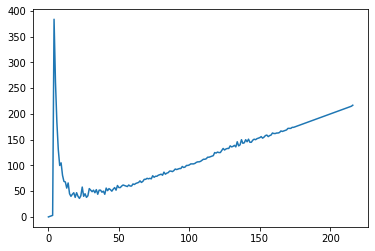

In [270]:
# w_min = min(weight_list)
w_max = max(weight_list)
weight_freq = list(range(w_max+1))
for w in weight_list:
    weight_freq[w] += 1
plt.plot(weight_freq)

In [271]:
print(sum(weight_freq[6:]))
dict(zip(range(len(weight_freq)),weight_freq))

25143


{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 384,
 5: 262,
 6: 184,
 7: 131,
 8: 100,
 9: 105,
 10: 81,
 11: 69,
 12: 68,
 13: 56,
 14: 66,
 15: 45,
 16: 40,
 17: 44,
 18: 47,
 19: 38,
 20: 47,
 21: 40,
 22: 36,
 23: 41,
 24: 58,
 25: 40,
 26: 45,
 27: 38,
 28: 41,
 29: 55,
 30: 52,
 31: 49,
 32: 52,
 33: 47,
 34: 53,
 35: 44,
 36: 52,
 37: 52,
 38: 48,
 39: 50,
 40: 44,
 41: 56,
 42: 51,
 43: 55,
 44: 53,
 45: 50,
 46: 54,
 47: 57,
 48: 52,
 49: 61,
 50: 57,
 51: 57,
 52: 60,
 53: 62,
 54: 61,
 55: 60,
 56: 59,
 57: 62,
 58: 60,
 59: 60,
 60: 64,
 61: 63,
 62: 65,
 63: 66,
 64: 67,
 65: 70,
 66: 67,
 67: 69,
 68: 73,
 69: 73,
 70: 75,
 71: 74,
 72: 75,
 73: 74,
 74: 80,
 75: 77,
 76: 79,
 77: 79,
 78: 81,
 79: 82,
 80: 83,
 81: 81,
 82: 87,
 83: 83,
 84: 85,
 85: 86,
 86: 89,
 87: 89,
 88: 88,
 89: 90,
 90: 93,
 91: 92,
 92: 93,
 93: 94,
 94: 94,
 95: 98,
 96: 96,
 97: 97,
 98: 100,
 99: 100,
 100: 101,
 101: 103,
 102: 103,
 103: 103,
 104: 104,
 105: 106,
 106: 107,
 107: 107,
 108: 108,
 109: 1

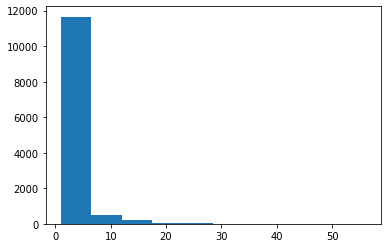

In [245]:
plt.hist(weight_list, bins=10)
plt.show()

In [112]:
threshold = 150
for g in G_ccs:
    print("Num nodes: {}, Num edges: {}".format(len(g.nodes), len(g.edges)))
    print("Min degree: {}, Max degree: {}".format(min(g.degree), max(g.degree)))
    for node in g:
        to_remove = []
        if g.degree[node] < threshold:
            to_remove.append(node)
            
#         new_labels = list(range(len(g.nodes)))
#         label_mapping = 
    g_copy = nx.Graph(g)
    g_copy.remove_nodes_from(to_remove)
    print("Num nodes: {}, Num edges: {}".format(len(g.nodes), len(g.edges)))
    print()

Num nodes: 21089, Num edges: 7547955
Min degree: ('hconres1-93', 159), Max degree: ('hres999-93', 201)
Num nodes: 21089, Num edges: 7547955

Num nodes: 6, Num edges: 15
Min degree: ('hr15581-93', 5), Max degree: ('hr8658-93', 5)
Num nodes: 6, Num edges: 15

Num nodes: 5127, Num edges: 1458793
Min degree: ('s1-93', 328), Max degree: ('sres99-93', 506)
Num nodes: 5127, Num edges: 1458793



In [114]:
G_ccs[1].nodes(data=True)

NodeDataView({'hr15581-93': {'bipartite': 0}, 'hr6799-93': {'bipartite': 0}, 'hr8658-93': {'bipartite': 0}, 'hr4037-93': {'bipartite': 0}, 'hr6800-93': {'bipartite': 0}, 'hr4655-93': {'bipartite': 0}})

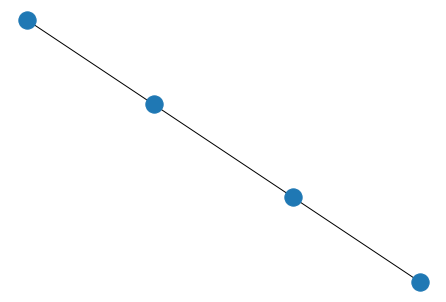

In [116]:
gb = nx.path_graph(4)
nx.draw(gb)

DGLGraph(num_nodes=11186, num_edges=305198,
         ndata_schemes={}
         edata_schemes={})

In [64]:
# # Create a demo graph with two connected components
# G1 = nx.barabasi_albert_graph(100, 4)
# G2 = nx.barabasi_albert_graph(200, 3)
# new_labels = {n-100:n for n in range(100, 300)}
# G2 = nx.relabel_nodes(G2, new_labels)
# G = nx.compose(G1, G2)

# # Serperate a Graph object into its connected components
# G_list = [G.subgraph(selected_nodes) for selected_nodes in nx.connected_components(G)]
# DGL_list = [None for _ in range(len(G_list))]
# for i in range(len(G_list)):
#     # DGL likes directed graphs
#     Gdi = nx.DiGraph(G_list[i])
#     K = dgl.DGLGraph()
#     K.from_networkx(Gdi)
#     DGL_list[i] = K


[DGLGraph(num_nodes=100, num_edges=768,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=200, num_edges=1182,
          ndata_schemes={}
          edata_schemes={})]

In [39]:
with open('/home/sam/neu/gml/G-Meta/G-Meta_Data/arxiv/graph_dgl.pkl', 'rb') as f:
    dgl_arxiv = pickle.load(f)

In [41]:
dgl_arxiv

[DGLGraph(num_nodes=169343, num_edges=1166243,
          ndata_schemes={}
          edata_schemes={})]

In [45]:
bills_passed.head()

,bill_id,bill_type,com_chair,com_rank,cospons_num,party_control_congress,pass_law,session,veto,title_text
9265,hjres1-93,hjres,1.0,0.0,0.0,100,1,93,0.0,A joint resolution extending the time within w...
9266,hjres1-94,hjres,1.0,0.0,0.0,100,1,94,0.0,Joint resolution extending the time within whi...
9268,hjres1-96,hjres,0.0,0.0,0.0,100,1,96,0.0,A joint resolution to extend the time for fili...
9280,hjres1-108,hjres,NaN,NaN,0.0,200,1,108,NaN,Making further continuing appropriations for t...
9302,hjres2-108,hjres,NaN,NaN,0.0,200,1,108,NaN,Joint Resolution making consolidated appropria...


In [145]:
bill_features = pd.read_csv('/home/sam/neu/gml/data/congress/original/bills_features_label.csv')
congressman_features = pd.read_csv('/home/sam/neu/gml/data/congress/original/congressman_features_v2.csv')
bills_passed = bill_features[bill_features['pass_law']==1]
path = '~/neu/gml/data/congress/original/edgelist_Congress'+str(94)+'.csv'
c94 = pd.read_csv(path)

In [52]:
c94[c94['bill_id'].isin(bills_passed['bill_id'])]

,bill_id,thomas_id
4671,hjres1-94,726
4786,hjres92-94,996
4787,hjres92-94,1033
5145,hjres210-94,726
5188,hjres219-94,726
...,...,...
102851,sjres203-94,1417
102873,sjres209-94,1282
102874,sjres209-94,1294
102875,sjres209-94,1338


In [146]:
congressman_features.head()
# congressman_features['party_code'].unique()

,thomas_id,bioguide_id,firstname,lastname,gender,party_code,state_abbr,Year of birthdate
0,1,A000009,James,Abdnor,M,200,SD,1923.0
1,2,A000014,Neil,Abercrombie,M,100,HI,1938.0
2,1268,A000017,James,Abourezk,M,100,SD,1931.0
3,3,A000018,Bella,Abzug,F,100,NY,1920.0
4,4,A000022,Gary,Ackerman,M,100,NY,1942.0


In [ ]:
bill_features = pd.read_csv('/home/sam/neu/gml/data/congress/bills_features_label.csv')
congressman_features = pd.read_csv('/home/sam/neu/gml/data/congress/congressman_features.csv')
bills_passed = bill_features[bill_features['pass_law']==1]

In [239]:
len(nx_passed_list)
for gr in nx_passed_list:
    print(len(list(nx.connected_components(gr))))

20
12
15
2
1
1
1
2
1
2
2
1
2
2
2
2
1
1
2
1
1


In [128]:
def add_majority_party(dataframe):
    total = 0
    majority_party_dict = {}
    missing_data = set()
    for bill in list(dataframe['bill_id'].unique()):
        party = []
        for t_id in dataframe[dataframe['bill_id']==bill]['thomas_id'].unique():
            if t_id not in list(congressman_features['thomas_id']):
                missing_data.add(t_id)
                continue
            party_options = congressman_features[congressman_features['thomas_id']==t_id]['party_code']

            # If there are multiple parties, select a random one
            party.append(np.random.choice(party_options))
        # Let the majority party be the most common
        if not len(party):
            majority_party_dict[bill] = None
            continue
        majority_party_dict[bill] = Counter(party).most_common()[0][0]
    print('    Missing data for: ',missing_data)
    return majority_party_dict

In [274]:
nx_passed_list = []
# label_dict_master = {}
for i in range(93, 114):
    print('Congress ', i)
    path = '/home/sam/neu/gml/data/congress/original/edgelist_Congress'+str(i)+'.csv'
    df = pd.read_csv(path)
    df_passed = df[df['bill_id'].isin(bills_passed['bill_id'])]
#     print('    creating labels')
#     labels = add_majority_party(df_passed)
#     label_dict_master[i] = labels
#     path = '/home/sam/neu/gml/data/congress/pruned/labels/'+str(i)+'.json'
#     with open(path, 'wb') as f:
#         pickle.dump(labels, f)
#     print('    labels written')
#     print('    creating graph')
    G = nx.Graph()
    G.add_nodes_from(list(df_passed['bill_id'].unique()), bipartite=0)
    G.add_nodes_from(list(df_passed['thomas_id'].unique()), bipartite=1)
    edge_list = list(zip(df_passed['bill_id'], df_passed['thomas_id']))
    G.add_edges_from(edge_list)
    G = bipartite.weighted_projected_graph(G, list(df_passed['bill_id']))
    # Remove edges with weight < 6
    edge_list = list(G.edges(data=True))
    for edge in edge_list:
        if edge[2]['weight'] < 6:
            G.remove_edge(edge[0], edge[1])
    remove = [node for node,degree in dict(G.degree()).items() if degree < 1]
    G.remove_nodes_from(remove)
    print('   ',len(G), ' nodes,', len(G.edges), 'edges')
    nx_passed_list.append(G)
    path = '/home/sam/neu/gml/data/congress/pruned/graphs'+str(i)+'_graph.edgelist.gz'
    nx.write_edgelist(G, path)
    print()

Congress  93
    131  nodes, 1017 edges

Congress  94
    98  nodes, 289 edges

Congress  95
    156  nodes, 412 edges

Congress  96
    197  nodes, 3120 edges

Congress  97
    94  nodes, 1722 edges

Congress  98
    113  nodes, 4722 edges

Congress  99
    370  nodes, 24718 edges

Congress  100
    403  nodes, 25702 edges

Congress  101
    359  nodes, 22873 edges

Congress  102
    301  nodes, 16459 edges

Congress  103
    183  nodes, 4831 edges

Congress  104
    109  nodes, 1123 edges

Congress  105
    101  nodes, 1303 edges

Congress  106
    249  nodes, 4525 edges

Congress  107
    166  nodes, 1863 edges

Congress  108
    225  nodes, 3501 edges

Congress  109
    210  nodes, 3190 edges

Congress  110
    252  nodes, 5190 edges

Congress  111
    192  nodes, 2615 edges

Congress  112
    116  nodes, 1363 edges

Congress  113
    145  nodes, 2073 edges



In [275]:
for k,l in label_dict_master.items():
    
    print(k,':',Counter(l.values()))

93 : Counter({100: 585, 200: 181, None: 5})
94 : Counter({100: 564, 200: 159, None: 3, 112: 2, 328: 1})
95 : Counter({100: 652, 200: 149, None: 2})
96 : Counter({100: 576, 200: 157, None: 1})
97 : Counter({100: 219, 200: 86})
98 : Counter({100: 185, 200: 28, None: 3})
99 : Counter({100: 466, 200: 218, None: 2})
100 : Counter({100: 609, 200: 148, None: 1})
101 : Counter({100: 526, 200: 136, None: 2, 328: 1})
102 : Counter({100: 503, 200: 104, 328: 2, None: 1})
103 : Counter({100: 362, 200: 102, None: 9})
104 : Counter({200: 238, 100: 98, None: 1})
105 : Counter({200: 191, 100: 71, None: 1})
106 : Counter({200: 380, 100: 221, None: 3})
107 : Counter({200: 221, 100: 157, None: 5})
108 : Counter({200: 311, 100: 189, None: 3})
109 : Counter({200: 290, 100: 189, None: 3})
110 : Counter({100: 315, 200: 137, None: 6, 328: 1})
111 : Counter({100: 316, 200: 65, None: 3})
112 : Counter({200: 165, 100: 116, None: 3})
113 : Counter({100: 151, 200: 142, None: 2, 328: 1})


# Relabel nodes

In [282]:
def interpret_feature_string(fs):
    return np.array([float(x) for x in fs[1:-1].split(', ')])

path = '/home/sam/neu/gml/data/congress'
dgl_gs = [None]*len(nx_passed_list)
node_to_int = {}
int_to_node = {}
df_features = pd.read_csv(os.path.join(path, 'features_df.csv'))
df_features = df_features.set_index('bill_id')
feature_map = [None]*len(nx_passed_list)
info = {} # labels dictionary
for i, g in tqdm(enumerate(nx_passed_list)):
#     Gcc = sorted(nx.connected_components(G0), key=len, reverse=True)
#     g = G0.subgraph(Gcc[0])
    congress_number = i+93
    features = np.array([interpret_feature_string(
                    df_features['vector'].loc[node]) for node in list(g.nodes)])
    feature_map[i] = features
    node_to_int[congress_number] = dict(zip(list(g.nodes), range(len(g.nodes))))
    int_to_node[congress_number] = dict(zip(range(len(g.nodes)), list(g.nodes)))
    for node in list(g.nodes):
        party = label_dict_master[congress_number][node]
        if party not in [100, 200]:
            party = np.random.choice([100,200])
        info[str(i)+'_'+str(node_to_int[congress_number][node])] = party
    

    g_relabeled = nx.relabel_nodes(g, node_to_int[congress_number])
    digraph = nx.DiGraph(g_relabeled)
    K = dgl.DGLGraph()
    K.from_networkx(digraph)
    dgl_gs[i] = K

with open(path + '/pruned/graph_dgl.pkl', 'wb') as f:
    pickle.dump(dgl_gs, f)

with open(path + '/pruned/label.pkl', 'wb') as f:
    pickle.dump(info, f)
    
with open(path + '/pruned/node_to_int.pkl', 'wb') as f:
    pickle.dump(int_to_node, f)

with open(path + '/pruned/int_to_node.pkl', 'wb') as f:
    pickle.dump(int_to_node, f)
    
    
np.save(path + '/pruned/features.npy', np.array(feature_map, dtype='object'))

21it [00:00, 127.04it/s]


In [284]:
for fd in dgl_gs:
    print(len(fd))

131
98
156
197
94
113
370
403
359
301
183
109
101
249
166
225
210
252
192
116
145


In [235]:
dgl_gs

[DGLGraph(num_nodes=771, num_edges=25020,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=729, num_edges=17584,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=803, num_edges=22720,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=734, num_edges=42264,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=305, num_edges=16748,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=216, num_edges=21052,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=686, num_edges=112726,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=758, num_edges=127658,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=665, num_edges=114454,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nodes=610, num_edges=87268,
          ndata_schemes={}
          edata_schemes={}),
 DGLGraph(num_nod

In [277]:
num_of_labels = 2
df = pd.DataFrame.from_dict(info, orient='index').reset_index().rename(columns={"index": "name", 0: "label"})

# for example, specify the graph idx to be used for val, test set, other graphs are put in the meta-train
# folds = [[0, 20], [1, 19], [2, 19]]

# for fold_n, i in enumerate(folds):
#     temp_path = path + '/fold' + str(fold_n+1)
val_graph = 2
test_graph = 16
train_graphs = list(range(len(dgl_gs)))
train_graphs.remove(val_graph)
train_graphs.remove(test_graph)


val_df = df[df.name.str.contains(str(val_graph)+'_')]
test_df = df[df.name.str.contains(str(test_graph)+'_')]

train_df = df[~df.index.isin(val_df.index)]
train_df = train_df[~train_df.index.isin(test_df.index)]
train_df.reset_index(drop = True).to_csv(path + '/pruned/train.csv')
val_df.reset_index(drop = True).to_csv(path + '/pruned/val.csv')
test_df.reset_index(drop = True).to_csv(path + '/pruned/test.csv')

In [205]:
sum([len(x) for x in feature_map])

10745

In [283]:
G.nodes
# rkey = dict(zip(list(G.nodes), range(len(G.nodes))))
# nx.relabel_nodes(G, rkey).nodes

# df_features = pd.read_csv('/home/sam/neu/gml/data/congress/features_df.csv')
# df_features = df_features.set_index('bill_id')
# [float(x) for x in df_features['vector'].loc['hconres1-93'][1:-1].split(', ')]
# info = {}
# for k, v in label_dict_master.items():
#     for bill, party in v.items():
#         if party not in [0, 100, 200]:
#             party = 0
# #         info[str(k-93)+'_'+str(node_to_int[k])] = party
#         info[str(k-93)+'_'+str(10)] = party
#         break
#     break
# print(info)
df = pd.DataFrame.from_dict(info, orient='index').reset_index().rename(
                columns={"index": "name", 0: "label"})
df
# path = '/home/sam/neu/gml/data/congress'
# with open(path + '/label.pkl', 'wb') as f:
#     pickle.dump(info, f)

,name,label
0,0_0,100
1,0_1,100
2,0_2,100
3,0_3,100
4,0_4,100
...,...,...
4165,20_140,200
4166,20_141,100
4167,20_142,200
4168,20_143,100
